In [72]:
%load_ext autoreload
%autoreload 2

import os 

base_path = '/sdf/home/c/chitturi/neural-representation-sqw/'
os.chdir(base_path)

#from utils import *
from src.utils import * 

import pandas as pd

tf.random.set_seed(47)
np.random.seed(47)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
model = tf.keras.models.load_model('surrogate_model')

In [74]:
# Load experimental slice 1 
c_q_slice1 = np.array(pd.read_csv(os.path.join('data_experimental/Qlist_path2_woBG.csv'), header=None)).T
c_E_slice1 = np.array(pd.read_csv(os.path.join('data_experimental/Elist_path2_woBG.csv'), header=None)[0]).T
c_sqw_slice1 = np.array(pd.read_csv(os.path.join('data_experimental/Sqw_path2.csv'), header=None)).T
c_sqw_slice1_woBG = np.array(pd.read_csv(os.path.join('data_experimental/Sqw_path2_woBG.csv'), header=None)).T

# Load experimental slice 2
c_q_slice2 = np.array(pd.read_csv(os.path.join('data_experimental/Qlist_path3_woBG.csv'), header=None)).T
c_E_slice2 = np.array(pd.read_csv(os.path.join('data_experimental/Elist_path3_woBG.csv'), header=None)[0]).T
c_sqw_slice2 = np.array(pd.read_csv(os.path.join('data_experimental/Sqw_path3.csv'), header=None)).T
c_sqw_slice2_woBG = np.array(pd.read_csv(os.path.join('data_experimental/Sqw_path3_woBG.csv'), header=None)).T


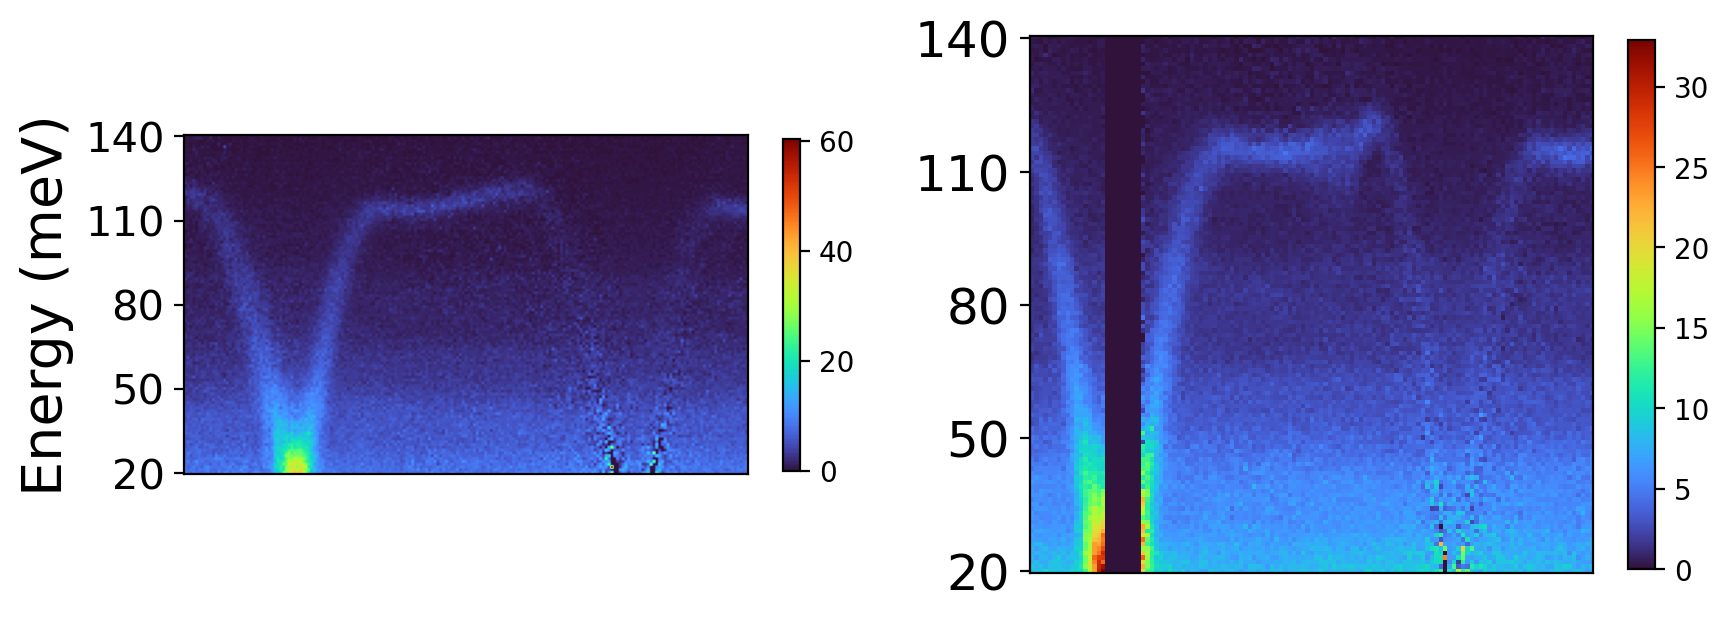

In [57]:
fig, axs = plt.subplots(1, 2, dpi = 200, figsize=(10,10))
im1 = axs[0].imshow(c_sqw_slice1.T, origin = 'lower', cmap = 'turbo', vmin=0)
cb1 = fig.colorbar(im1, ax=axs[0], shrink = 0.22)

#axs[0].set_title('Predicted Slice 1', fontsize = 20)
im2 = axs[1].imshow(c_sqw_slice2.T, origin = 'lower', cmap = 'turbo', vmin=0)
cb2 = fig.colorbar(im2, ax=axs[1], shrink = 0.35)

#axs[1].set_title('Experimental Slice 1' , fontsize = 20)
axs[0].set_ylabel('Energy (meV)', fontsize= 20)
axs[0].set_yticks(np.linspace(0,120,5))
axs[1].set_yticks(np.linspace(0,120,5))
axs[0].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)
axs[1].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 18)

axs[0].set_xticks([])
axs[1].set_xticks([])

plt.savefig('original_data.eps', format='eps')

plt.show()


In [59]:
# Convert image data into (q, E) format for tensorflow optimization
test_x_1, test_y_1 = image_to_coords(c_q_slice1, c_E_slice1, c_sqw_slice1, background_start=150,background_end=160)
test_x_2, test_y_2 = image_to_coords(c_q_slice2, c_E_slice2, c_sqw_slice2, background_start=95,background_end=100)

# Fit slice 1 

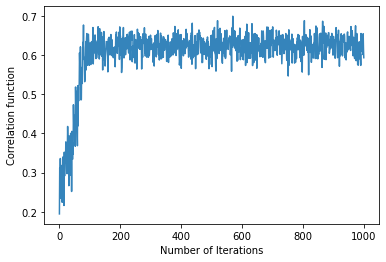

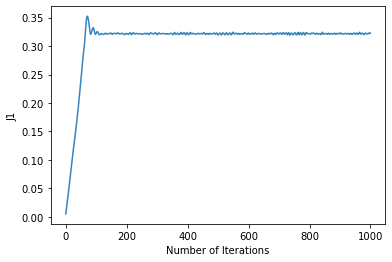

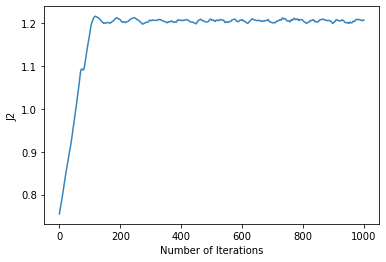

In [60]:
test_x = tf.convert_to_tensor(test_x_1, dtype=tf.float32)
test_y = tf.convert_to_tensor(test_y_1, dtype=tf.float32)

# Run surrogate model optimization

learning_rate = 0.005 
batch_size = 2048
max_iter=1000

min_loss, min_loss_j1, min_loss_j2, metrics  = optimize_surrogate(test_x, test_y, model, learning_rate = learning_rate, batch_size = batch_size, max_iter=max_iter, plotting = True, fixed_start = True, set_seed = True)

In [61]:
print(min_loss_j1, min_loss_j2)

0.3212634027004242 1.2085158824920654


In [63]:
model_prediction_slice1 = path2mesh_expt(min_loss_j1, min_loss_j2, c_q_slice1, c_E_slice1, model)

np.save('figures/data_for_figures/prediction_array_path1', model_prediction_slice1)

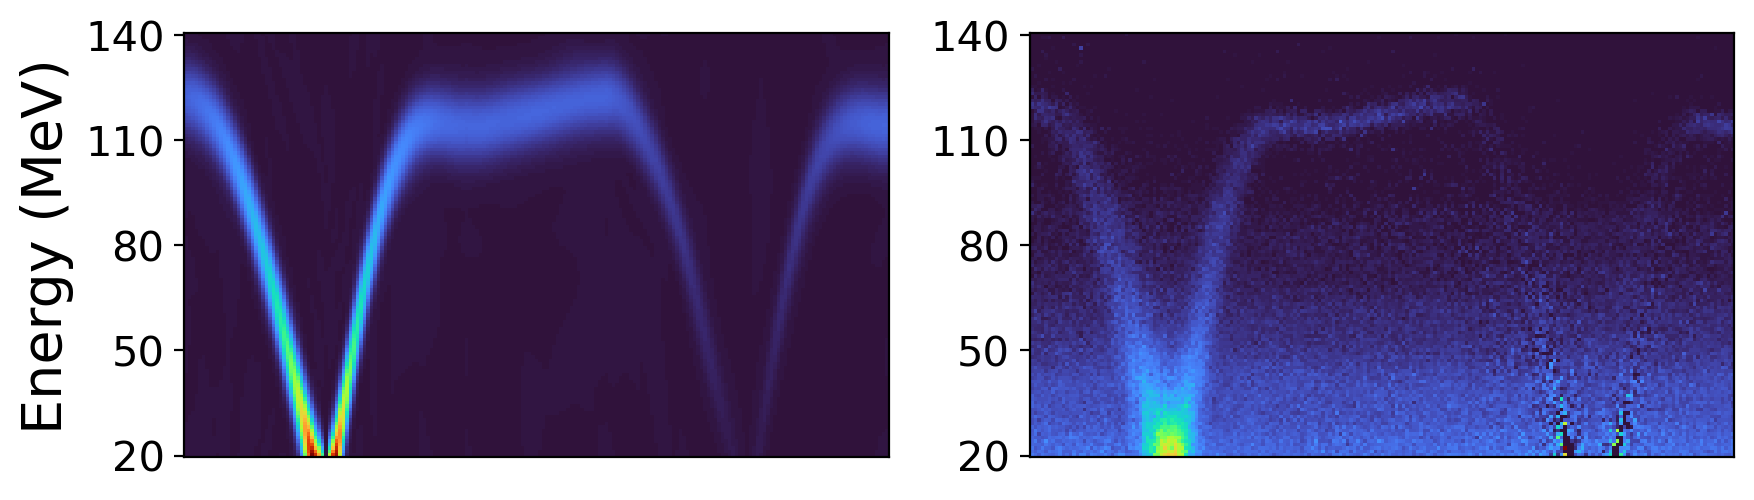

In [62]:
pred_slice1_image = np.exp(path2mesh_expt(min_loss_j1, min_loss_j2, c_q_slice1, c_E_slice1, model)) - 1 

fig, axs = plt.subplots(1, 2, dpi = 200, figsize=(10,10))
axs[0].imshow(pred_slice1_image, origin = 'lower', cmap = 'turbo')
#axs[0].set_title('Predicted Slice 1', fontsize = 20)
axs[1].imshow(c_sqw_slice1.T, origin = 'lower', cmap = 'turbo', vmin=0.8)
#axs[1].set_title('Experimental Slice 1' , fontsize = 20)
axs[0].set_ylabel('Energy (MeV)', fontsize= 20)
axs[0].set_yticks(np.linspace(0,120,5))
axs[1].set_yticks(np.linspace(0,120,5))
axs[0].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)
axs[1].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)

axs[0].set_xticks([])
axs[1].set_xticks([])

plt.show()

# Fit slice 2

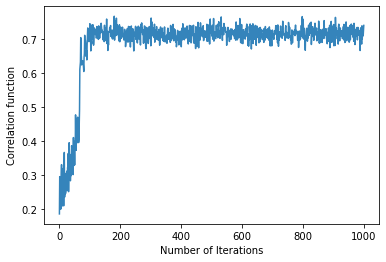

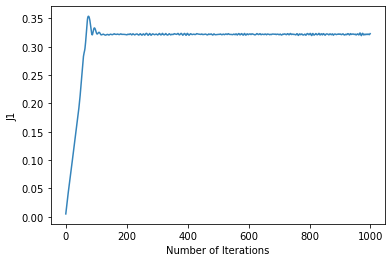

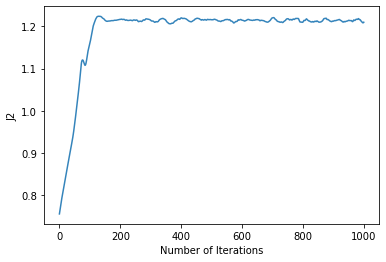

In [64]:
test_y = tf.convert_to_tensor(test_y_2[test_y_2 != 0], dtype=tf.float32)
test_x = tf.convert_to_tensor(test_x_2[test_y_2 != 0], dtype=tf.float32)

# Run surrogate model optimization

learning_rate = 0.005 
batch_size = 2048
max_iter=1000

min_loss, min_loss_j1, min_loss_j2, metrics  = optimize_surrogate(test_x, test_y, model, learning_rate = learning_rate, batch_size = batch_size, max_iter=max_iter, plotting = True, fixed_start = True, set_seed = True)

In [65]:
print(min_loss_j1, min_loss_j2)

0.32258340716362 1.2147157192230225


In [66]:
model_prediction_slice2 = path2mesh_expt(min_loss_j1, min_loss_j2, c_q_slice2, c_E_slice2, model)

np.save('figures/data_for_figures/prediction_array_path2', model_prediction_slice2)

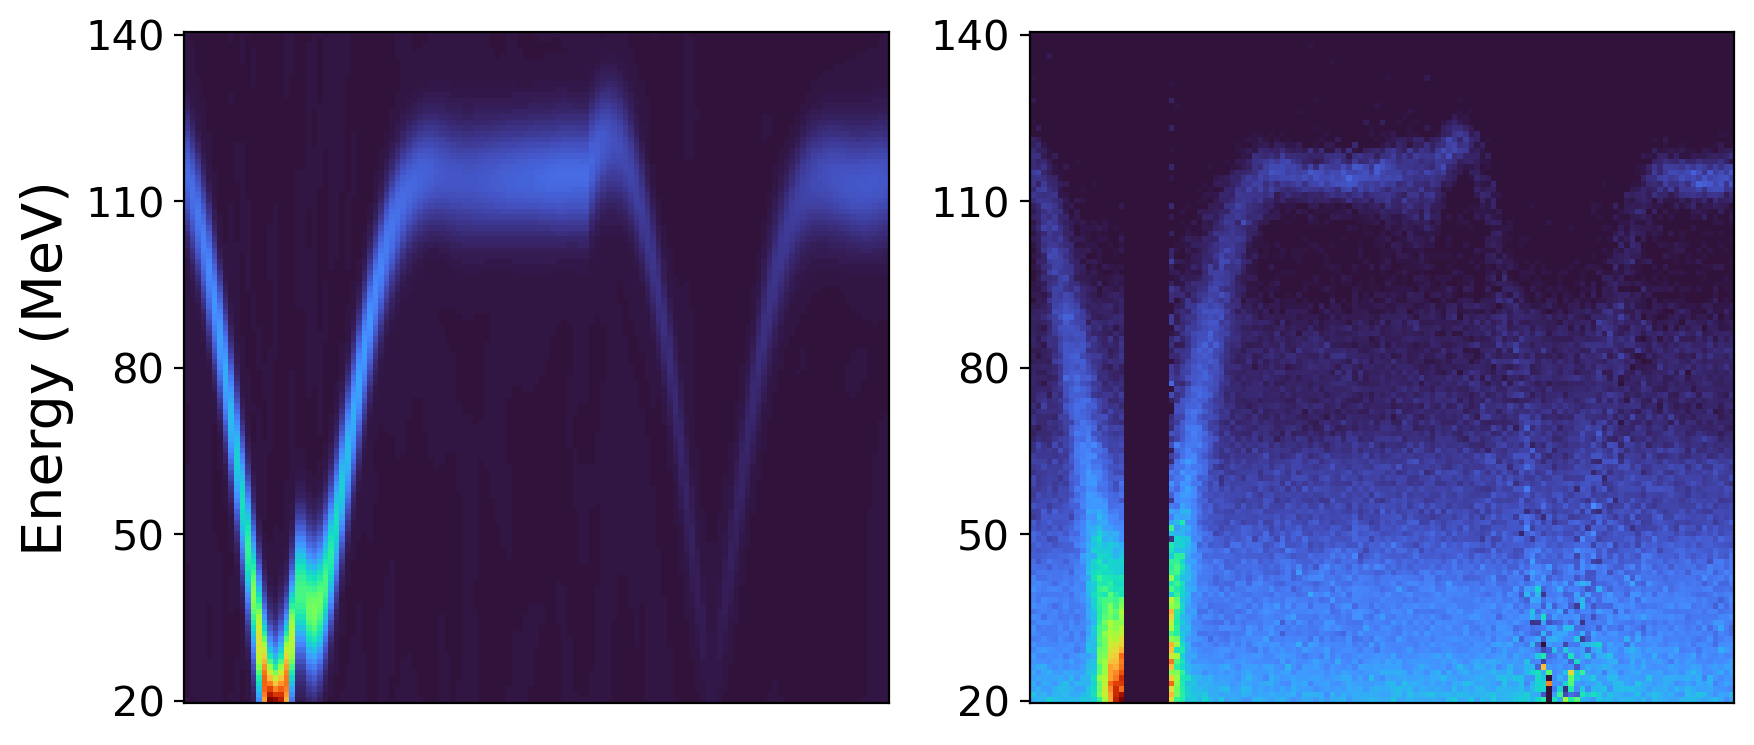

In [50]:
pred_slice2_image = np.exp(path2mesh_expt(min_loss_j1, min_loss_j2, c_q_slice2, c_E_slice2, model)) - 1 

fig, axs = plt.subplots(1, 2, dpi = 200, figsize=(10,10))
axs[0].imshow(np.exp(pred_slice2_image)-1, origin = 'lower', cmap = 'turbo')
#axs[0].set_title('Predicted Slice 1', fontsize = 20)
axs[1].imshow(c_sqw_slice2.T, origin = 'lower', cmap = 'turbo', vmin=0.8)
#axs[1].set_title('Experimental Slice 1' , fontsize = 20)
axs[0].set_ylabel('Energy (MeV)', fontsize= 20)
axs[0].set_yticks(np.linspace(0,120,5))
axs[1].set_yticks(np.linspace(0,120,5))
axs[0].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)
axs[1].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)

axs[0].set_xticks([])
axs[1].set_xticks([])

plt.show()

# Fit slice 1 and 2 together 

In [67]:
# Convert image data into (q, E) format for tensorflow optimization
test_x_1, test_y_1 = image_to_coords(c_q_slice1, c_E_slice1, c_sqw_slice1, background_start=150,background_end=160)
test_x_2, test_y_2 = image_to_coords(c_q_slice2, c_E_slice2, c_sqw_slice2, background_start=95,background_end=100)

test_x = tf.convert_to_tensor(np.vstack((test_x_1, test_x_2[test_y_2 != 0])), dtype=tf.float32)

# mask applied to y on second slice because data is missing 
test_y = tf.convert_to_tensor(np.concatenate((test_y_1, test_y_2[test_y_2 != 0])), dtype=tf.float32)

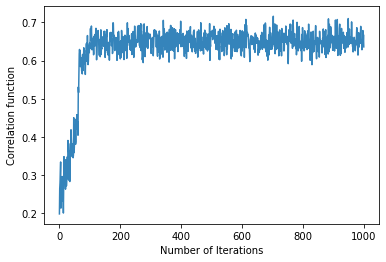

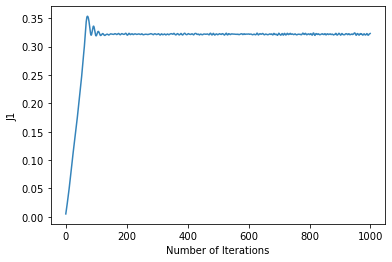

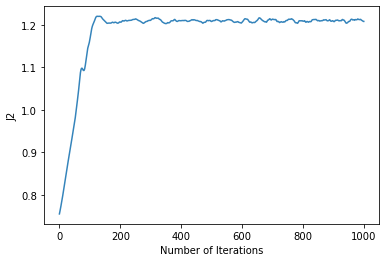

In [68]:
# Run surrogate model optimization

learning_rate = 0.005 
batch_size = 2048
max_iter=1000

min_loss, min_loss_j1, min_loss_j2, metrics  = optimize_surrogate(test_x, test_y, model, learning_rate = learning_rate, batch_size = batch_size, max_iter=max_iter, plotting = True, fixed_start = True, set_seed = True)

In [70]:
model_prediction_slice2 = path2mesh_expt(min_loss_j1, min_loss_j2, c_q_slice2, c_E_slice2, model)
np.save('figures/data_for_figures/prediction_array_fit_together_path2', model_prediction_slice2)

model_prediction_slice1 = path2mesh_expt(min_loss_j1, min_loss_j2, c_q_slice1, c_E_slice1, model)
np.save('figures/data_for_figures/prediction_array_fit_together_path1', model_prediction_slice1)

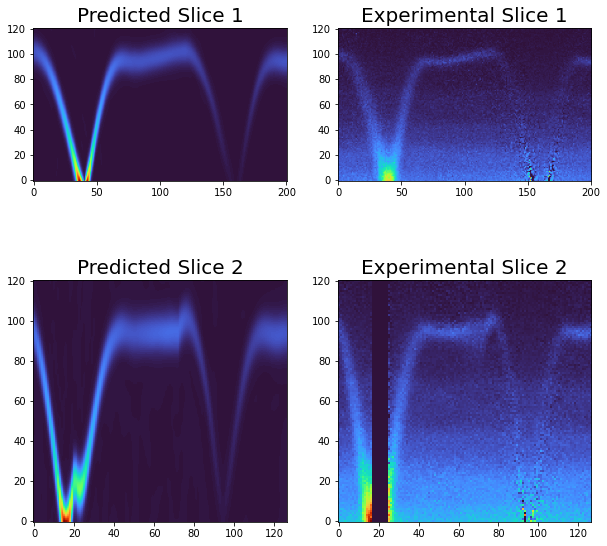

In [53]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].imshow(np.exp(pred_slice1_image) - 1, origin = 'lower', cmap = 'turbo')
axs[0, 0].set_title('Predicted Slice 1', fontsize = 20)
axs[0, 1].imshow(c_sqw_slice1.T, origin = 'lower', cmap = 'turbo')
axs[0, 1].set_title('Experimental Slice 1' , fontsize = 20)
axs[1, 0].imshow(np.exp(pred_slice2_image) - 1, origin = 'lower', cmap = 'turbo')
axs[1, 0].set_title('Predicted Slice 2', fontsize = 20)
axs[1, 1].imshow(c_sqw_slice2.T, origin = 'lower', cmap = 'turbo')
axs[1, 1].set_title('Experimental Slice 2', fontsize = 20)
plt.show()

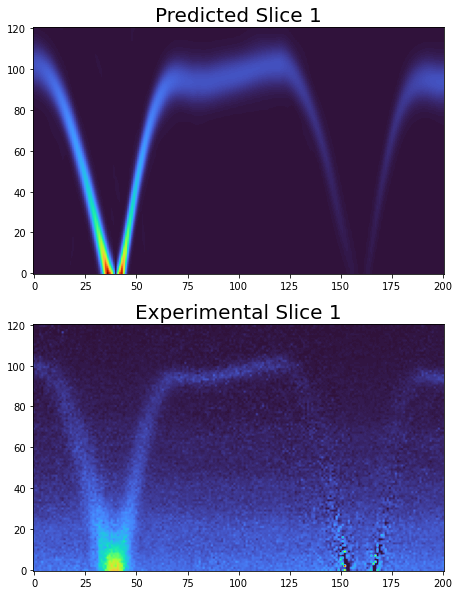

In [29]:
fig, axs = plt.subplots(2, figsize=(10,10))
axs[0].imshow(np.exp(pred_slice1_image) - 1, origin = 'lower', cmap = 'turbo')
axs[0].set_title('Predicted Slice 1', fontsize = 20)
axs[1].imshow(c_sqw_slice1.T, origin = 'lower', cmap = 'turbo')
axs[1].set_title('Experimental Slice 1' , fontsize = 20)
plt.show()

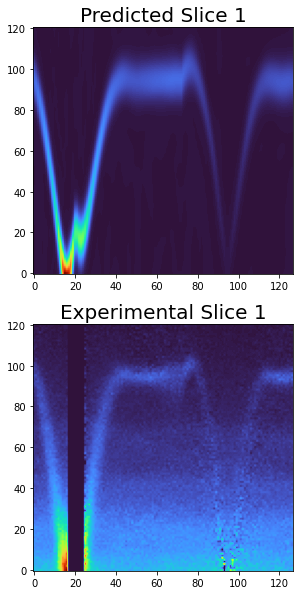

In [39]:
fig, axs = plt.subplots(2, figsize=(20,10))
axs[0].imshow(np.exp(pred_slice2_image) - 1, origin = 'lower', cmap = 'turbo')
axs[0].set_title('Predicted Slice 1', fontsize = 20)
axs[1].imshow(c_sqw_slice2.T, origin = 'lower', cmap = 'turbo')
axs[1].set_title('Experimental Slice 1' , fontsize = 20)
plt.show()

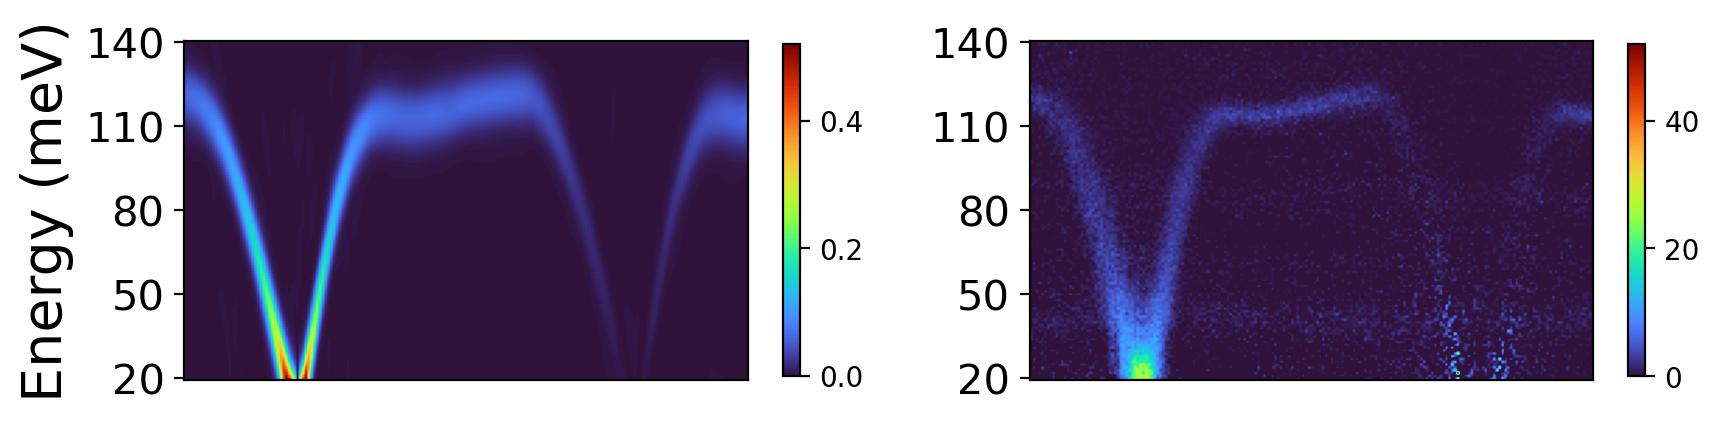

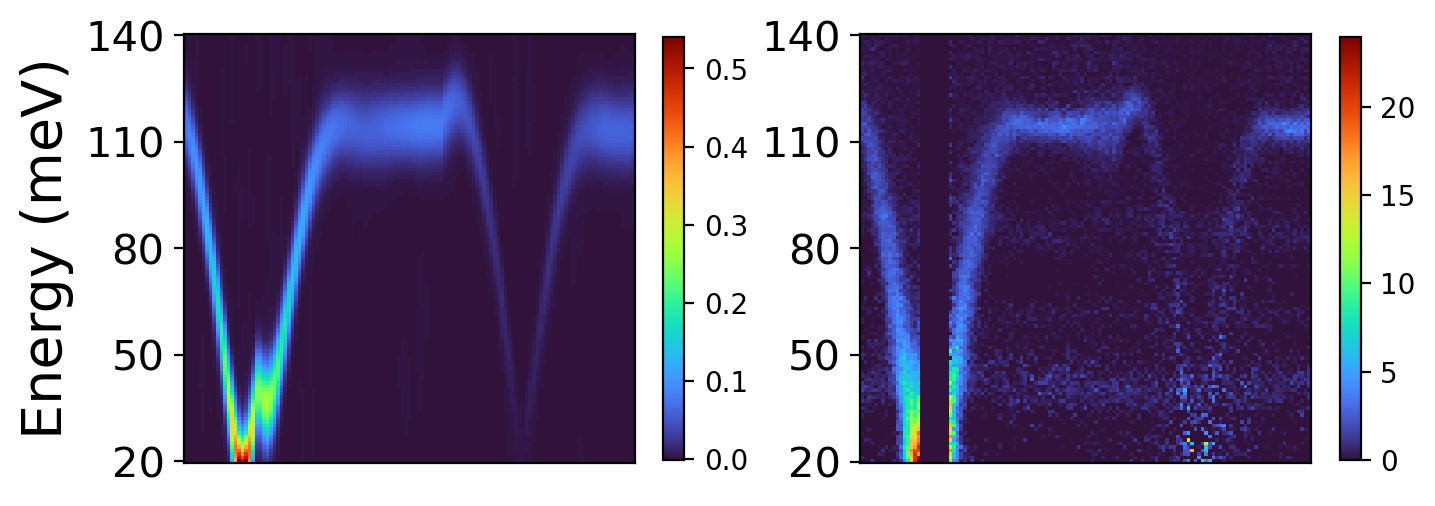

In [47]:
c_sqw_slice1 = np.array(pd.read_csv(os.path.join('data_experimental/Sqw_path2_woBG.csv'), header=None)).T
c_sqw_slice2 = np.array(pd.read_csv(os.path.join('data_experimental/Sqw_path3_woBG.csv'), header=None)).T

fig, axs = plt.subplots(1, 2, dpi = 200, figsize=(10,10))
im1 = axs[0].imshow(pred_slice1_image, origin = 'lower', cmap = 'turbo')
cb1 = fig.colorbar(im1, ax=axs[0], shrink = 0.22)

#axs[0].set_title('Predicted Slice 1', fontsize = 20)
im2 = axs[1].imshow(c_sqw_slice1.T, origin = 'lower', cmap = 'turbo', vmin=0)
cb2 = fig.colorbar(im2, ax=axs[1], shrink = 0.22)

#axs[1].set_title('Experimental Slice 1' , fontsize = 20)
axs[0].set_ylabel('Energy (meV)', fontsize= 20)
axs[0].set_yticks(np.linspace(0,120,5))
axs[1].set_yticks(np.linspace(0,120,5))
axs[0].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)
axs[1].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)

axs[0].set_xticks([])
axs[1].set_xticks([])

plt.savefig('path1_together.eps', format='eps')

plt.show()

fig, axs = plt.subplots(1, 2, dpi = 200, figsize=(8,10))
im1 = axs[0].imshow(pred_slice2_image, origin = 'lower', cmap = 'turbo')
#axs[0].set_title('Predicted Slice 1', fontsize = 20)
im2 = axs[1].imshow(c_sqw_slice2.T, origin = 'lower', cmap = 'turbo' , vmin=0)

fig.colorbar(im1, ax=axs[0], shrink = 0.28)
fig.colorbar(im2, ax=axs[1], shrink = 0.28)

#axs[1].set_title('Experimental Slice 1' , fontsize = 20)
axs[0].set_ylabel('Energy (meV)', fontsize= 20)
axs[0].set_yticks(np.linspace(0,120,5))
axs[1].set_yticks(np.linspace(0,120,5))
axs[0].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)
axs[1].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)

axs[0].set_xticks([])
axs[1].set_xticks([])

plt.savefig('path2_together.eps', format='eps')

plt.show()

## Missing Region

In [100]:
# Load experimental slice 2
c_q_slice2 = np.array(pd.read_csv(os.path.join('data_experimental/Qlist_path3_woBG.csv'), header=None)).T
c_E_slice2 = np.array(pd.read_csv(os.path.join('data_experimental/Elist_path3_woBG.csv'), header=None)[0]).T
c_sqw_slice2 = np.array(pd.read_csv(os.path.join('data_experimental/Sqw_path3_woBG_corr.csv'), header=None)).T


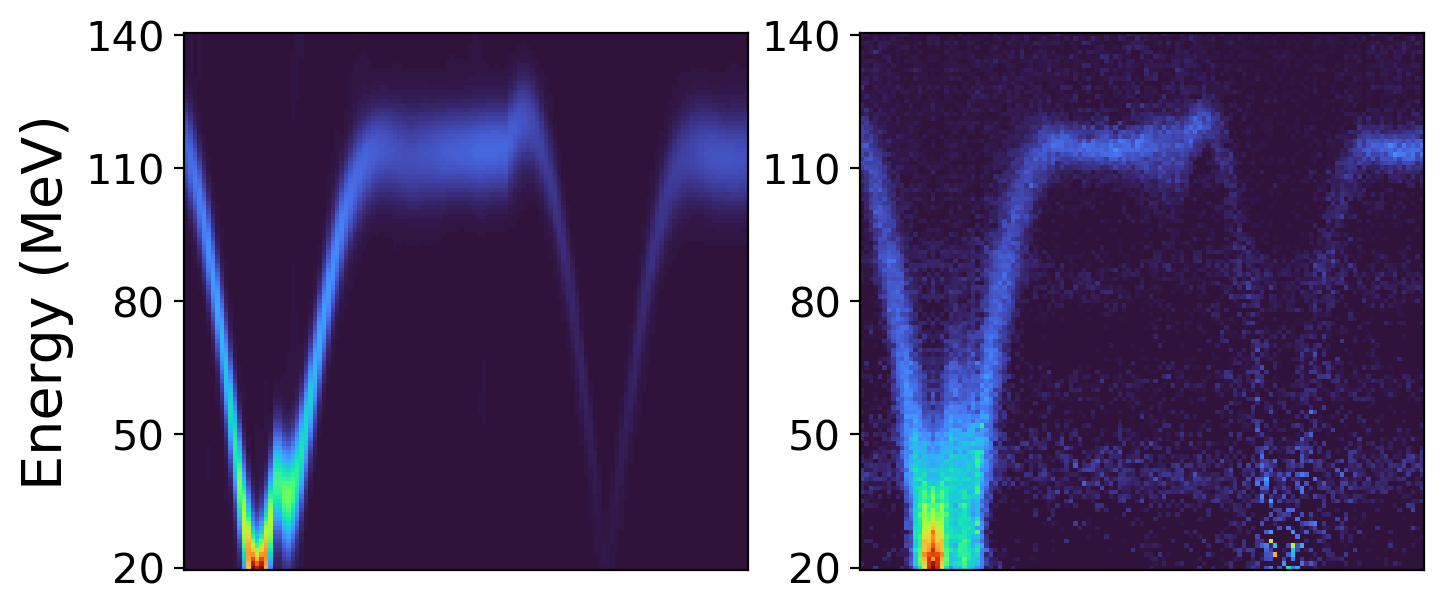

In [107]:
fig, axs = plt.subplots(1, 2, dpi = 200, figsize=(8,10))
axs[0].imshow(np.exp(pred_slice2_image)-1, origin = 'lower', cmap = 'turbo')
#axs[0].set_title('Predicted Slice 1', fontsize = 20)
axs[1].imshow(c_sqw_slice2.T, origin = 'lower', cmap = 'turbo', vmin=0.01)
#axs[1].set_title('Experimental Slice 1' , fontsize = 20)
axs[0].set_ylabel('Energy (MeV)', fontsize= 20)
axs[0].set_yticks(np.linspace(0,120,5))
axs[1].set_yticks(np.linspace(0,120,5))
axs[0].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)
axs[1].set_yticklabels(list(np.linspace(20,140,5).astype(int)), fontsize = 15)

axs[0].set_xticks([])
axs[1].set_xticks([])

plt.savefig('path2_together_filled.eps', format='eps')

plt.show()

# loss landscape

In [77]:
# if this is too slow, reduce grid resolution
loss_vals = calculate_loss_landscape(test_x, test_y, model, gridsize = 75)

100%|██████████| 5625/5625 [1:56:11<00:00,  1.24s/it]


In [78]:
np.save('figures/data_for_figures/loss_landscape_full', np.array(loss_vals))

In [ ]:
import matplotlib.tri as tri

plt.figure(figsize=(8, 6), dpi=80)
plt.tricontour(loss_vals[:,0], loss_vals[:,1], loss_vals[:,2], 21, linewidths=2.0, cmap='gist_heat')
plt.xlabel('J1', fontsize=16)
plt.ylabel('J2', fontsize=16)
plt.scatter([0.328], [1.2198], marker = '*', s=300, color = 'maroon', label = 'Analytical Fitting')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from matplotlib import cm
import matplotlib 

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_trisurf(loss_vals[:,0], loss_vals[:,1], loss_vals[:,2], cmap=cm.coolwarm, linewidth=0)
ax.set_xlabel('j1', fontsize = 20)
ax.set_ylabel('j2', fontsize = 20)
fig.colorbar(surf)
fig.tight_layout()
# Hide grid lines
ax.grid(False)
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.set_zticks([])
ax.view_init(9, 125)
plt.show() # or: